In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import utils

In [3]:
dataset_path = '/cluster/tufts/hugheslab/eharve06/MNIST'
(X_train, train_labels), (X_val, val_labels), (X_test, test_labels) = utils.load_mnist_dataset(dataset_path)

In [4]:
train_event_times, _, t_train, y_train = utils.generate_survival_mnist(train_labels, random_state=42)
_, _, t_val, y_val = utils.generate_survival_mnist(val_labels, random_state=42)
_, _, t_test, y_test = utils.generate_survival_mnist(test_labels, random_state=42)

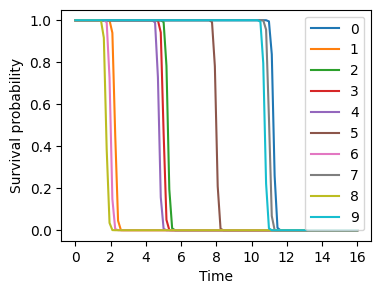

In [5]:
def percent(y):
    return np.sum(y)/len(y)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
for label in range(10):
    ax.plot(np.linspace(0, 16, num=100), [percent(train_event_times[train_labels==label]>i) for i in np.linspace(0, 16, num=100)], label=f'{label}')
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
ax.set_xlabel('Time')
ax.set_ylabel('Survival probability')
plt.legend()
plt.show()

In [6]:
print('Censoring Rates')
for label in [8, 6, 1, 4, 3, 2, 5, 9, 7, 0]:
    print(f'Digit {label}: {100*(1-percent(y_train[train_labels==label])):.2f}%')

Censoring Rates
Digit 8: 3.14%
Digit 6: 5.78%
Digit 1: 8.10%
Digit 4: 34.31%
Digit 3: 36.97%
Digit 2: 39.49%
Digit 5: 66.96%
Digit 9: 95.79%
Digit 7: 98.72%
Digit 0: 99.92%
